# Lending Club Case Study

### Group Members :

Mr. Bhushan Date (Group Facilitator)

Mr. Diwakar S (Group Member)

### Batch - Feb 2022

-----------------------------------------------------------------------------------------------------------------------------

### Firstly lets understand the data by reading the provided .csv files

In [1]:
import numpy as np          # importing NumPy library for performing Mathematical computing
import pandas as pd         # importing Pandas library for data manipulation 
from My_functions import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dtype = {'next_pymnt_d': 'object'}
loan_data = pd.read_csv('loan.csv')     # Reading csv file & saving into dataframe 'loan_data'

C:\Users\Bhushan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
loan_data.head()                        # Printing top 5 rows for data viewing

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Observation:
Data has 39717 entries.
there are total 111 columns

In [5]:
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Identifying null values in columns

In [6]:
loan_data.isnull().sum()                                     # Counting sum of all Null values in columns

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Observation:
There are multiple columns having no data, so need to eliminate these columns.

In [7]:
loan_data = loan_data.dropna(axis = 1, how = 'all')          # using inbuilt dropna function to eliminate non-useful columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Observation: 
The columns have have been reduced from 111 to 57, now lets delet columns having singular value like for example 'policy_code' has only '1' as value in all rows. This data will not provide a important insights about data. Hence eliminating these rows will be good opinion for focusing approach to important columns

In [8]:
list_one_unique = unwanted_column(loan_data)        # this 'unwanted_column' function is defined in My_functions.py file
list_one_unique

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [9]:
for i in list_one_unique:                          # now deleting these columns
    loan_data = loan_data.drop([i],axis=1)

In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

##### Observation: 
The columns have have been reduced from 57 to 48.


In [11]:
list_more_null = column_null(loan_data)        # this 'column_null' function is defined in My_functions.py file
list_more_null                                 #list of coulmns having more than 50% null values 


['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [12]:
for j in list_more_null:                       #removing the columns having more than 50% null values
    loan_data = loan_data.drop([j],axis=1)

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

##### Observation: 
The columns have have been reduced from 48 to 45.

Now removing the rows which are having null values in more than 50% of columns

In [14]:
loan_data.drop(loan_data[loan_data.isnull().sum(axis=1)>24].index,axis=0,inplace=True)

In [15]:
loan_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

##### Observation: 
The number of rows not disturbed, indicating that there are no rows having more than 50% null values.

### Removing data of customers who are currently paying loan i.e. the customers having status 'current' in loan_status. 

In [16]:
loan_data = loan_data[~(loan_data.loan_status=='Current')]

In [17]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status   

##### Observation: 
The number of rows reduced from 39717 to 38577 after removing customers who are currently paying the loan 

### Reverification for columns having single values and removing the same

In [18]:
new_single_value_columns = unwanted_column(loan_data)
new_single_value_columns

['out_prncp', 'out_prncp_inv']

In [19]:
for j in new_single_value_columns:  #removing the columns having only single value since we filtered out current from the loan status 
    loan_data = loan_data.drop([j],axis=1)

In [20]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status   

##### Observation: 
The number of columns reduced from 45 to 43 after removing columns which are having single values after filtering out the current loan paying customers.   

### Customer behaviour variables are obtained after approval of the loan and doesnot influence in loan approval process. Thus removing the same from the dataset. 

In [21]:
List_customer_behaviour_variables = ['collection_recovery_fee','delinq_2yrs','earliest_cr_line','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','recoveries','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']

In [22]:
for k in List_customer_behaviour_variables:  #removing the customer behaviour variables columns
    loan_data = loan_data.drop([k],axis=1)

In [23]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  object 
 6   int_rate              38577 non-null  object 
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            37544 non-null  object 
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d            

##### Observation:
The number of columns reduced from 43 to 31 after removing customer behaviour columns 

### Now converting datatypes for further use
As rate is a float value but due to '%' value python identifies it as string and no arithmatic oprerations can be done on string data type. Hence filtering the data & converting the data type to int or float.


In [24]:
# removing '%' symbol from int_rate column & converting  
loan_data.int_rate = loan_data.int_rate.apply(lambda x : float(x.rstrip('%')))

# removing ' months' text from data and renaming column name from 'term' to 'term_in_month' for ease of tracking

loan_data.term = loan_data.term.apply(lambda x : int(x.replace(' months','')))
loan_data.rename(columns = {'term':'term_in_month'}, inplace = True)

In [25]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_month,int_rate,installment,grade,sub_grade,...,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,860xx,AZ,27.65,1,3,0,13648,83.70%,9,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,309xx,GA,1.00,5,3,0,1687,9.40%,4,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,606xx,IL,8.72,2,2,0,2956,98.50%,10,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,917xx,CA,20.00,1,10,0,5598,21%,37,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,852xx,AZ,11.20,3,9,0,7963,28.30%,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,802xx,CO,11.33,0,13,0,7274,13.10%,40,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,274xx,NC,6.40,1,6,0,8847,26.90%,9,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,017xx,MA,2.30,0,11,0,9698,19.40%,20,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,208xx,MD,3.72,0,17,0,85607,0.70%,26,NaN


In [26]:
# removing '%' symbol from revol_util column & converting data type
loan_data['revol_util'] = (loan_data['revol_util'].str.strip('%').astype(float))

In [27]:
loan_data['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### Observation:

As given in data dictionary "Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years "

Hence converting "< 1 years " to "0"

In [28]:
loan_data.emp_length = loan_data.emp_length.apply(lambda x : '0' if x == ('< 1 year') else x)

loan_data.emp_length.value_counts()

10+ years    8488
0            4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### Now removing '+' & ' years' from the data for ease of analysis.

In [29]:
loan_data['emp_length'] = (loan_data['emp_length'].str.strip(' years'))
loan_data['emp_length'] = (loan_data['emp_length'].str.strip('+'))
loan_data['emp_length'].value_counts()

10    8488
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

### Observation:
Now all the employee length values are in integer from object type.

In [30]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term_in_month         38577 non-null  int64  
 6   int_rate              38577 non-null  float64
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            37544 non-null  object 
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d            

### Analysing float variables

In [31]:
loan_data.funded_amnt_inv.value_counts()

5000.000000     1294
10000.000000    1264
6000.000000     1182
12000.000000    1016
8000.000000      887
                ... 
5913.729658        1
24240.110000       1
16458.930000       1
18911.950000       1
7959.595570        1
Name: funded_amnt_inv, Length: 8050, dtype: int64

##### Converting data types 

As seen above all data have decimal points upto six decimals. For better understanding 5913.729658 has same meaning as 5914. Hence rounding up the values & converting it to integer type

In [32]:
loan_data.funded_amnt_inv = loan_data.funded_amnt_inv.astype('int64')

In [33]:
loan_data.funded_amnt_inv.value_counts()

5000     1294
10000    1264
6000     1182
12000    1016
8000      888
         ... 
17245       1
19643       1
16572       1
3293        1
8345        1
Name: funded_amnt_inv, Length: 6582, dtype: int64

In [34]:
# rounding up values by converting it into int 

### Horizontal deployment on another variables

In [35]:
loan_data.annual_inc.value_counts()

60000.0     1466
50000.0     1029
40000.0      855
45000.0      811
30000.0      808
            ... 
80569.0        1
82116.0        1
242400.0       1
133300.0       1
27376.0        1
Name: annual_inc, Length: 5215, dtype: int64

In [36]:
loan_data.annual_inc = loan_data.annual_inc.astype('int64')        # rounding up values by converting it into int 

In [37]:
loan_data.annual_inc.value_counts()

60000     1466
50000     1030
40000      855
45000      811
30000      808
          ... 
64052        1
52769        1
120120       1
58852        1
27376        1
Name: annual_inc, Length: 5185, dtype: int64

##### Observation: 
Now all the columns have been converted to required format.
moving on to Imputing missing values

# Imputing missing values

### Analysing missing values

In [38]:
a = pd.DataFrame (loan_data.isnull().sum())
a['1']= loan_data.nunique()
a

,0,1
id,0,38577
member_id,0,38577
loan_amnt,0,870
funded_amnt,0,1019
funded_amnt_inv,0,6582
term_in_month,0,2
int_rate,0,370
installment,0,15022
grade,0,7
sub_grade,0,35


### Observation 
Following columns having Null values


**emp_title** - Descriptive column having 2386 Null values & 28027 unique values. Hence this column cannot be used to derive usefull insights.

**emp_length** - To be imputed

**desc** - Descriptive column having 12527 Null values & 25803 unique values. Hence this column cannot be used to derive usefull insights.

**title** - Descriptive column having only 11 Null values & 19297 unique values. Hence this column cannot be used to derive usefull insights.

**revol_util** - To be imputed

**pub_rec_bankruptcies** - To be imputed

In [39]:
# 1st imputation on emp_length column

In [40]:
#cannot visualize loan_data.emp_length since it is having object datatype and also having null values. 
#temp file is created for data visualization for deciding the imputataion value 

temp_data = loan_data[~(loan_data.emp_length.isnull())]
temp_data.emp_length = temp_data.emp_length.astype('float64')
temp_data.emp_length.describe()

C:\Users\Bhushan\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


count    37544.000000
mean         4.940976
std          3.557082
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

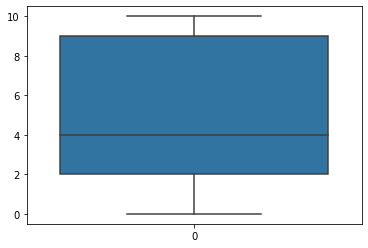

In [41]:
# plotting box plot for analysing the spread of data in range 0 to 10
sns.boxplot(data = temp_data.emp_length)
plt.show()

In [42]:
temp_data.emp_length.value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

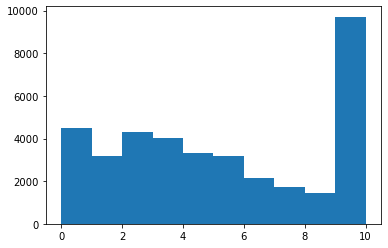

In [43]:
plt.hist(temp_data.emp_length)
plt.show()

In [44]:
# from the distribution, it is evident that imputing median(4) or mean(5) will disturb the distribution since number of null values is 1033
# imputing mode(10) will not vary the distribution, but it will be exaggrating the data, since we cannot impute 10+ years of experience to anyone who didnt fill the emp_length
# based on the above observations, 0 will be the best imputing value for emp_lenth 

In [45]:
loan_data['emp_length'] = loan_data['emp_length'].fillna('0')

In [46]:
loan_data['emp_length']=loan_data['emp_length'].astype('int64')

In [47]:
loan_data['emp_length'].value_counts()

10    8488
0     5541
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

### Observation: 
Null values are imputed as 0 in the emp_length column 

In [48]:
# Imputation on revol_util column

(array([2639., 1762., 1618., 1696., 1830., 1885., 1989., 2011., 2060.,
        2155., 2060., 2127., 2067., 2043., 1984., 1918., 1882., 1690.,
        1662., 1449.]),
 array([ 0.   ,  4.995,  9.99 , 14.985, 19.98 , 24.975, 29.97 , 34.965,
        39.96 , 44.955, 49.95 , 54.945, 59.94 , 64.935, 69.93 , 74.925,
        79.92 , 84.915, 89.91 , 94.905, 99.9  ]),
 <BarContainer object of 20 artists>)

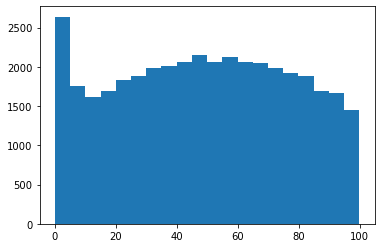

In [49]:
plt.hist(loan_data.revol_util,bins=20)

In [50]:
# Now we will see the revol_bal data for null values of revol_util 

In [51]:
temp = loan_data[loan_data.revol_util.isna()]
temp.revol_bal.value_counts()

0        49
49238     1
Name: revol_bal, dtype: int64

### Observation: 
As per the above data, out of total 50 customers (null coulmns) in revol_util, 49 cutomers not having 'Total credit revolving balance.

Hence, it is logical to say that those customers are having 0 'Revolving line utilization rate'

Thus, imputing 0 instead of null values in revol_util column

In [52]:
loan_data['revol_util'] = loan_data['revol_util'].fillna('0.00')
loan_data['revol_util']=loan_data['revol_util'].astype('float64')
loan_data.revol_util.isnull().sum()

0

In [53]:
loan_data.revol_util.value_counts()

0.00     1004
0.20       62
63.00      62
40.70      57
31.20      57
         ... 
77.63       1
25.74       1
0.83        1
47.36       1
7.28        1
Name: revol_util, Length: 1088, dtype: int64

In [54]:
# imputing for pub_rec_bankruptcies column

In [55]:
loan_data.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [56]:
loan_data.pub_rec_bankruptcies.describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [57]:
loan_data.pub_rec_bankruptcies.mode()

0    0.0
dtype: float64

### Observation: 
Contributing factors for imputing data, 
1. Mean() = 0.04
2. Median() = 0.0
3. Mode() = 0.0

Understanding the bankruptcies data,
1. it is 0 in case of no bankruptcies
2. it is a non-zero value in case of any bankruptcies
3. it is missing incase of no record/ no account in public bank 

so considering these all factors, the decided imputing value is 0 

In [58]:
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna('0')
loan_data['pub_rec_bankruptcies']=loan_data['pub_rec_bankruptcies'].astype('int64')
loan_data.pub_rec_bankruptcies.isnull().sum()

0

In [59]:
loan_data.pub_rec_bankruptcies.value_counts()

0    36935
1     1637
2        5
Name: pub_rec_bankruptcies, dtype: int64

# Removing outliers

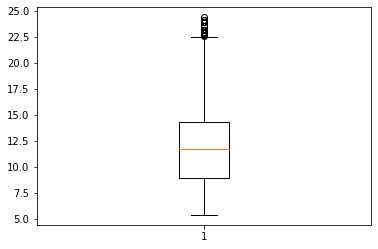

In [60]:
plt.boxplot(loan_data.int_rate)
plt.show()

In [61]:
loan_data[loan_data['int_rate']>=22.5].shape

(65, 31)

In [62]:
# Number to rows having interest rate above 22.5 is 65 which will not affect the distribution and analysis since number of data is less 

In [63]:
loan_data = loan_data[~(loan_data['int_rate']>=22.5)]
loan_data.int_rate.describe()

count    38512.000000
mean        11.913126
std          3.664993
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         22.480000
Name: int_rate, dtype: float64

##### Observation: 
Number of rows reduced from 38577 to 38512 

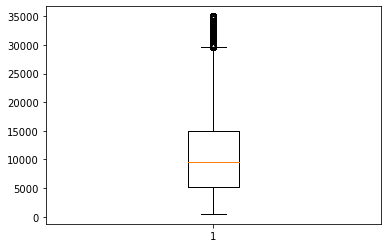

In [64]:
plt.boxplot(loan_data.loan_amnt)
plt.show()

In [65]:
loan_data[loan_data['loan_amnt']>=30000].shape

(1050, 31)

#### Number to rows having interest rate above 30000 is 1050 which will have impact in the distribution and analysis since number of data is huge. 
#### Logical explanation: loan amount can be any number requested by the customer, so it cannot be treated as outlier

# Moving to data analysis

### Now moving on to univariate data analysis
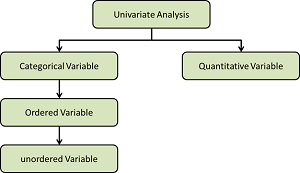
#### Univariate Analysis has basically two types
#### Categorical variables & Quantitative variables.

Firstly finding out insights from Categorical variable

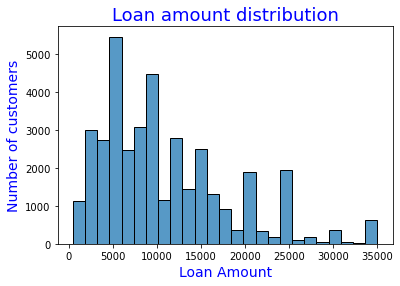

In [66]:
sns.histplot(loan_data.loan_amnt,bins=25)
plt.xlabel('Loan Amount', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Number of customers',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Loan amount distribution',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: Insight 1
As per the histogram, 
Number of loans are more in the range of 5000  

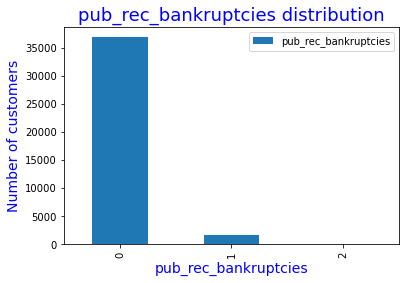

In [67]:
loan_data.pub_rec_bankruptcies.value_counts().plot(kind='bar')
plt.xlabel('pub_rec_bankruptcies', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Number of customers',  fontdict = {'size':14, 'color' : 'b'})
plt.title('pub_rec_bankruptcies distribution',fontdict = {'size':18, 'color' : 'b'})
plt.legend()
plt.show()

### Observation: Insight 2 

Customers with no entry in pub_rec_bankruptcies have applied for loan more than people having pub_rec_bankruptcies

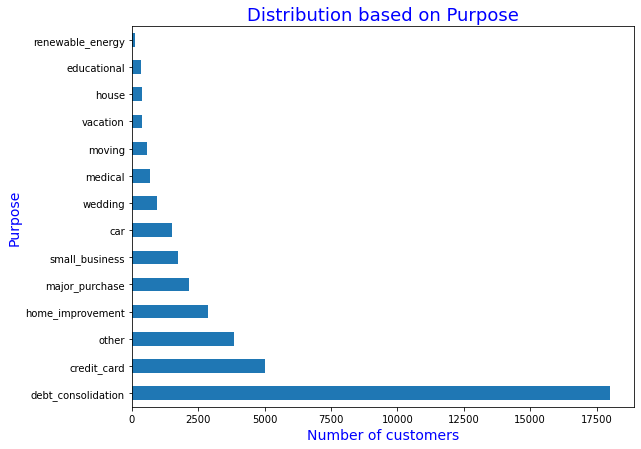

In [68]:
plt.figure(figsize =[9,7])
loan_data['purpose'].value_counts().plot.barh()
plt.xlabel('Number of customers', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Purpose', fontdict = {'size':14, 'color' : 'b'})
plt.title('Distribution based on Purpose',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: Insight 3
As per the above graph, 
Customers applying loan for the purpose of debt_consolidation is the highest. 

## Segmented Univariate:

In [69]:
# Lets visualize single variable along with segmentation based on other variable

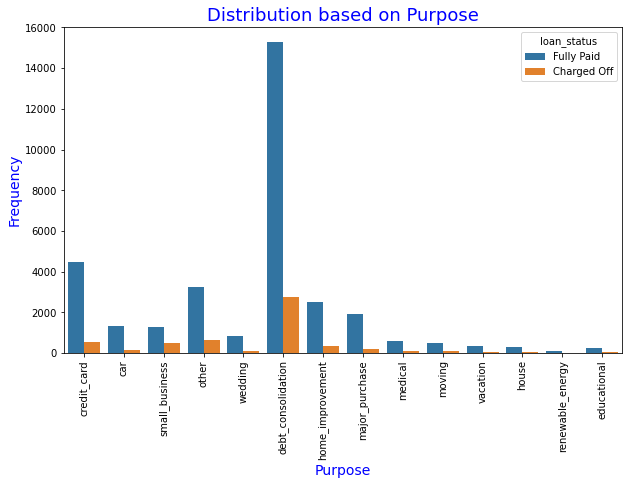

In [70]:
plt.figure(figsize =[10,6])
sns.countplot(data = loan_data, x = 'purpose',hue='loan_status') 
plt.xticks(rotation=90)
plt.xlabel('Purpose', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Frequency', fontdict = {'size':14, 'color' : 'b'})
plt.title('Distribution based on Purpose',fontdict = {'size':18, 'color' : 'b'})
plt.show()

In [71]:
temp = pd.crosstab(loan_data.purpose, loan_data.loan_status)
temp

loan_status,Charged Off,Fully Paid
purpose,,
car,159,1339
credit_card,540,4480
debt_consolidation,2748,15264
educational,56,269
home_improvement,346,2527
house,58,308
major_purchase,222,1927
medical,106,575
moving,92,484


In [72]:
temp['percent'] = round(temp['Charged Off']/(temp['Charged Off']+temp['Fully Paid'])*100,2)  #percentage of defaulters 
temp

loan_status,Charged Off,Fully Paid,percent
purpose,,,
car,159,1339,10.61
credit_card,540,4480,10.76
debt_consolidation,2748,15264,15.26
educational,56,269,17.23
home_improvement,346,2527,12.04
house,58,308,15.85
major_purchase,222,1927,10.33
medical,106,575,15.57
moving,92,484,15.97


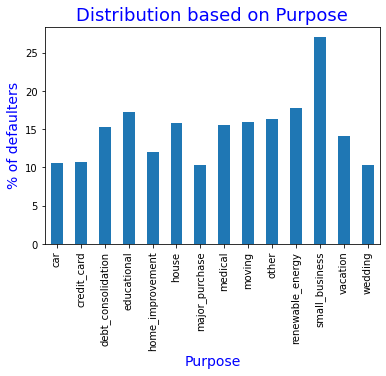

In [73]:
temp.percent.plot(kind = 'bar')
plt.xlabel('Purpose', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('% of defaulters',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Distribution based on Purpose',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: Insight 4
As per the above bar plot, 
it is evident that customers taking loan for small businesses are defaulting more. 

So bank should be cautious while providing loan for small business

In [74]:
loan_data.loan_status.value_counts()

Fully Paid     32915
Charged Off     5597
Name: loan_status, dtype: int64

In [75]:
temp2 = pd.crosstab(loan_data.int_rate, loan_data.loan_status)
temp2

loan_status,Charged Off,Fully Paid
int_rate,,
5.42,20,553
5.79,16,394
5.99,19,328
6.00,0,16
6.03,5,442
...,...,...
21.82,1,1
22.06,13,14
22.11,9,17


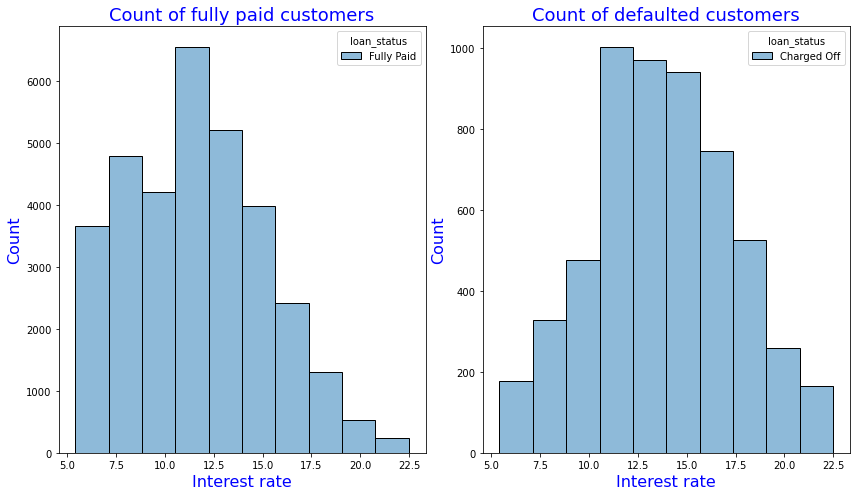

In [76]:
plt.figure(figsize =[12,7])

plt.subplot(1,2,1)
sns.histplot(data = loan_data[loan_data['loan_status']=='Fully Paid'] , x = 'int_rate', hue = 'loan_status', bins = 10)
plt.xlabel('Interest rate', fontdict = {'size':16, 'color' : 'b'})
plt.ylabel('Count', fontdict = {'size':16, 'color' : 'b'})
plt.title('Count of fully paid customers',fontdict = {'size':18, 'color' : 'b'})

plt.subplot(1,2,2)
sns.histplot(data = loan_data[loan_data['loan_status']=='Charged Off'] , x = 'int_rate', hue = 'loan_status', bins = 10)
plt.tight_layout()
plt.xlabel('Interest rate', fontdict = {'size':16, 'color' : 'b'})
plt.ylabel('Count', fontdict = {'size':16, 'color' : 'b'})
plt.title('Count of defaulted customers',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: Insight 5

It is clearly observed that interest rate plays major contribution in loan defaulting. As interest rate increases tendency of loan defaulters also increases.

Approximately beyond interest rate of ~11% percentage of defaulters increases relative to fully paid.

Hence high interest rate is a driving factor for loan defaulting.

In [77]:
loan_data.emp_length.value_counts()

10    8474
0     5534
2     4287
3     4001
4     3334
5     3188
1     3163
6     2165
7     1707
8     1433
9     1226
Name: emp_length, dtype: int64

In [78]:
temp3 = pd.crosstab(loan_data.emp_length, loan_data.loan_status)
temp3

loan_status,Charged Off,Fully Paid
emp_length,,
0,864,4670
1,453,2710
2,565,3722
3,547,3454
4,460,2874
5,456,2732
6,306,1859
7,262,1445
8,203,1230


In [79]:
temp3['percent'] = round(temp3['Charged Off']/(temp3['Charged Off']+temp3['Fully Paid'])*100,2)  #percentage of defaulters 
temp3

loan_status,Charged Off,Fully Paid,percent
emp_length,,,
0,864,4670,15.61
1,453,2710,14.32
2,565,3722,13.18
3,547,3454,13.67
4,460,2874,13.80
5,456,2732,14.30
6,306,1859,14.13
7,262,1445,15.35
8,203,1230,14.17


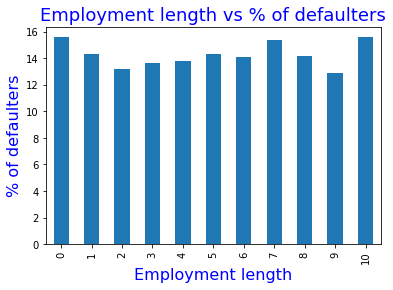

In [80]:
temp3.percent.plot(kind = 'bar')
plt.xlabel('Employment length', fontdict = {'size':16, 'color' : 'b'})
plt.ylabel('% of defaulters',  fontdict = {'size':16, 'color' : 'b'})
plt.title('Employment length vs % of defaulters',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: Insight 6

According to the provided data, 
the loan defaulting doesn't strongly depend on the number of employment years. 

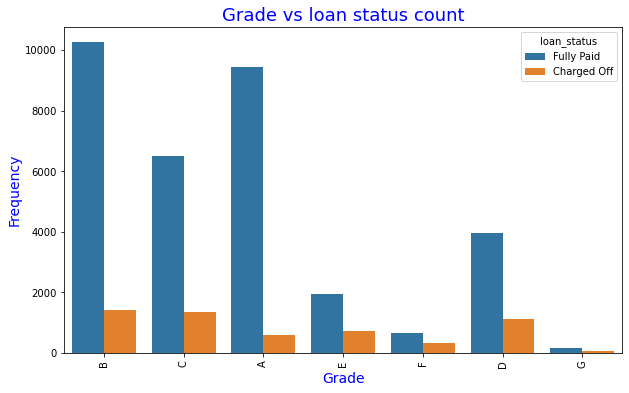

In [81]:
plt.figure(figsize =[10,6])
sns.countplot(data = loan_data, x = 'grade',hue='loan_status')
plt.xticks(rotation=90)

plt.xlabel('Grade', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Frequency',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Grade vs loan status count',fontdict = {'size':18, 'color' : 'b'})

plt.show()

In [82]:
temp4 = pd.crosstab(loan_data.grade, loan_data.loan_status)
temp4

loan_status,Charged Off,Fully Paid
grade,,
A,602,9443
B,1425,10250
C,1347,6487
D,1118,3967
E,715,1948
F,317,657
G,73,163


In [83]:
temp4['percent'] =  round(temp4['Charged Off']/(temp4['Charged Off']+temp4['Fully Paid'])*100,2)  #percentage of defaulters 
temp4

loan_status,Charged Off,Fully Paid,percent
grade,,,
A,602,9443,5.99
B,1425,10250,12.21
C,1347,6487,17.19
D,1118,3967,21.99
E,715,1948,26.85
F,317,657,32.55
G,73,163,30.93


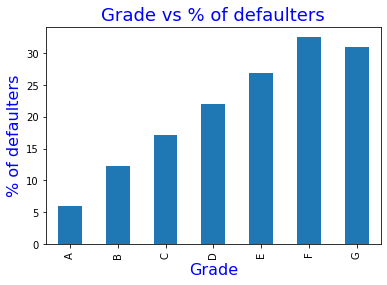

In [84]:
temp4.percent.plot(kind = 'bar')


plt.xlabel('Grade', fontdict = {'size':16, 'color' : 'b'})
plt.ylabel('% of defaulters',  fontdict = {'size':16, 'color' : 'b'})
plt.title('Grade vs % of defaulters',fontdict = {'size':18, 'color' : 'b'})

plt.show()

### Observation: Insight 7
As the grade increases from A to G, the precentage of defaulters increases. 

Grade F is having more number of defaulters.

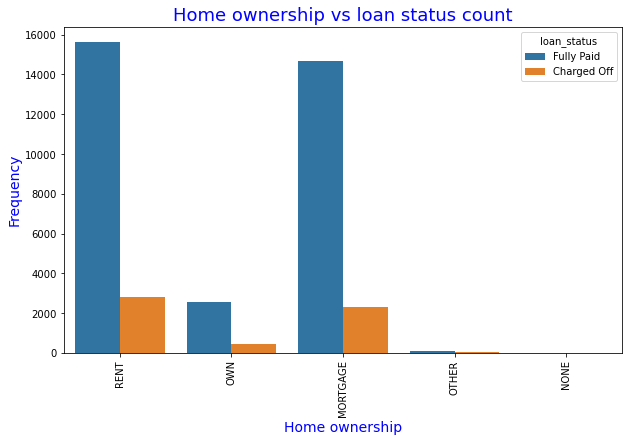

In [85]:
plt.figure(figsize =[10,6])
sns.countplot(data = loan_data, x = 'home_ownership',hue='loan_status')
plt.xticks(rotation=90)

plt.xlabel('Home ownership', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Frequency',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Home ownership vs loan status count',fontdict = {'size':18, 'color' : 'b'})
plt.show()

In [86]:
temp5 = pd.crosstab(loan_data.home_ownership, loan_data.loan_status)
temp5

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,2315,14678
NONE,0,3
OTHER,18,80
OWN,442,2531
RENT,2822,15623


In [87]:
temp5['percent'] =  round(temp5['Charged Off']/(temp5['Charged Off']+temp5['Fully Paid'])*100,2)  #percentage of defaulters 
temp5

loan_status,Charged Off,Fully Paid,percent
home_ownership,,,
MORTGAGE,2315,14678,13.62
NONE,0,3,0.00
OTHER,18,80,18.37
OWN,442,2531,14.87
RENT,2822,15623,15.30


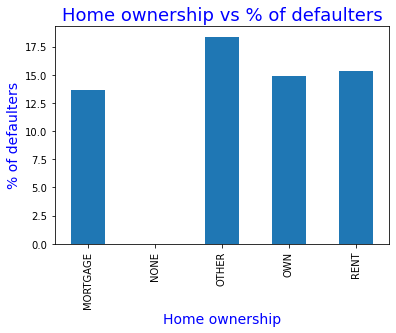

In [88]:
temp5.percent.plot(kind = 'bar')

plt.xlabel('Home ownership', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('% of defaulters',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Home ownership vs % of defaulters',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: Insight 8
Customers mentioning 'other' in the home ownership status found to have more defaulters.


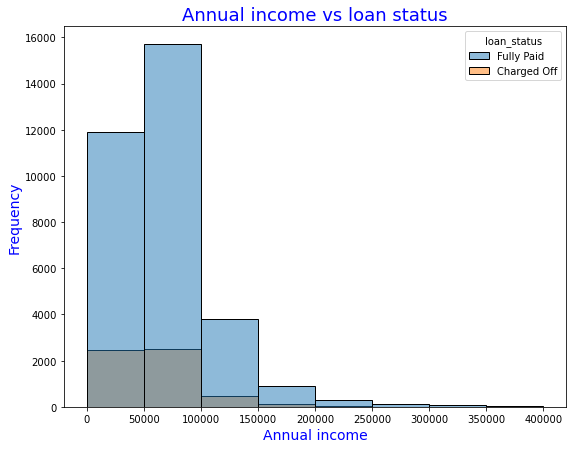

In [89]:
plt.figure(figsize =[9,7])
sns.histplot(data = loan_data, x = 'annual_inc', hue = 'loan_status', bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000])

plt.xlabel('Annual income', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Frequency',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Annual income vs loan status',fontdict = {'size':18, 'color' : 'b'})

plt.show()

### Observation: Insight 9

As per above graph Customers with less income are relatively more likely to charge off loan.

In [90]:
temp6 = pd.crosstab(loan_data.zip_code, loan_data.loan_status)
temp6

loan_status,Charged Off,Fully Paid
zip_code,,
007xx,0,1
010xx,14,84
011xx,1,13
012xx,1,12
013xx,3,10
...,...,...
995xx,5,28
996xx,2,10
997xx,6,13


In [91]:
temp6['percent'] =  round(temp6['Charged Off']/(temp6['Charged Off']+temp6['Fully Paid'])*100,2)  #percentage of defaulters 
temp6['total'] = temp6['Charged Off']+temp6['Fully Paid']
temp6.sort_values(by=['total'], ascending=False,inplace = True)
temp7 = temp6[temp6['total']>=200]
temp7

loan_status,Charged Off,Fully Paid,percent,total
zip_code,,,,
100xx,70,512,12.03,582
945xx,80,451,15.07,531
112xx,64,435,12.83,499
606xx,47,444,9.57,491
070xx,65,390,14.29,455
900xx,63,381,14.19,444
300xx,52,331,13.58,383
021xx,34,349,8.88,383
926xx,66,299,18.08,365


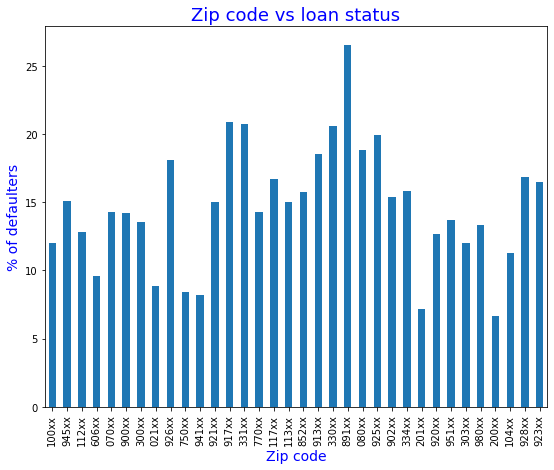

In [92]:
plt.figure(figsize =[9,7])
temp7.percent.plot(kind = 'bar')
plt.xlabel('Zip code', fontdict = {'size':16, 'color' : 'm'})
plt.ylabel('% of defaulters',  fontdict = {'size':16, 'color' : 'm'})

plt.xlabel('Zip code', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('% of defaulters',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Zip code vs loan status',fontdict = {'size':18, 'color' : 'b'})

plt.show()

### Observation: Insight 10
For attaning logical insight, considering zip codes with number of customers more than 200 for analysis.   

As per the above graph, 
Zip code of 891xx is having more percentage of defaulters. 


C:\Users\Bhushan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


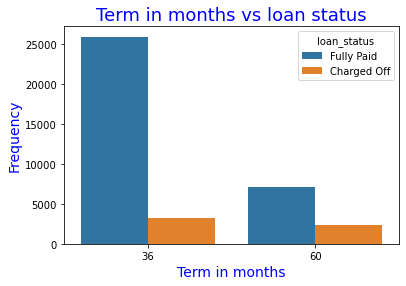

In [93]:
sns.countplot(loan_data.term_in_month,hue=loan_data.loan_status)

plt.xlabel('Term in months', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Frequency',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Term in months vs loan status',fontdict = {'size':18, 'color' : 'b'})

plt.show()

### Observation: 
As per the above bar plot, 
it is evident that percentage of defaulters increases as the term increases. 

Loan provider have to verify the term reason before providing the loan. 

In [94]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38512 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38512 non-null  int64  
 1   member_id             38512 non-null  int64  
 2   loan_amnt             38512 non-null  int64  
 3   funded_amnt           38512 non-null  int64  
 4   funded_amnt_inv       38512 non-null  int64  
 5   term_in_month         38512 non-null  int64  
 6   int_rate              38512 non-null  float64
 7   installment           38512 non-null  float64
 8   grade                 38512 non-null  object 
 9   sub_grade             38512 non-null  object 
 10  emp_title             36128 non-null  object 
 11  emp_length            38512 non-null  int64  
 12  home_ownership        38512 non-null  object 
 13  annual_inc            38512 non-null  int64  
 14  verification_status   38512 non-null  object 
 15  issue_d            

## Bivariate analysis: 


#### Now lets see the overview of different variables 

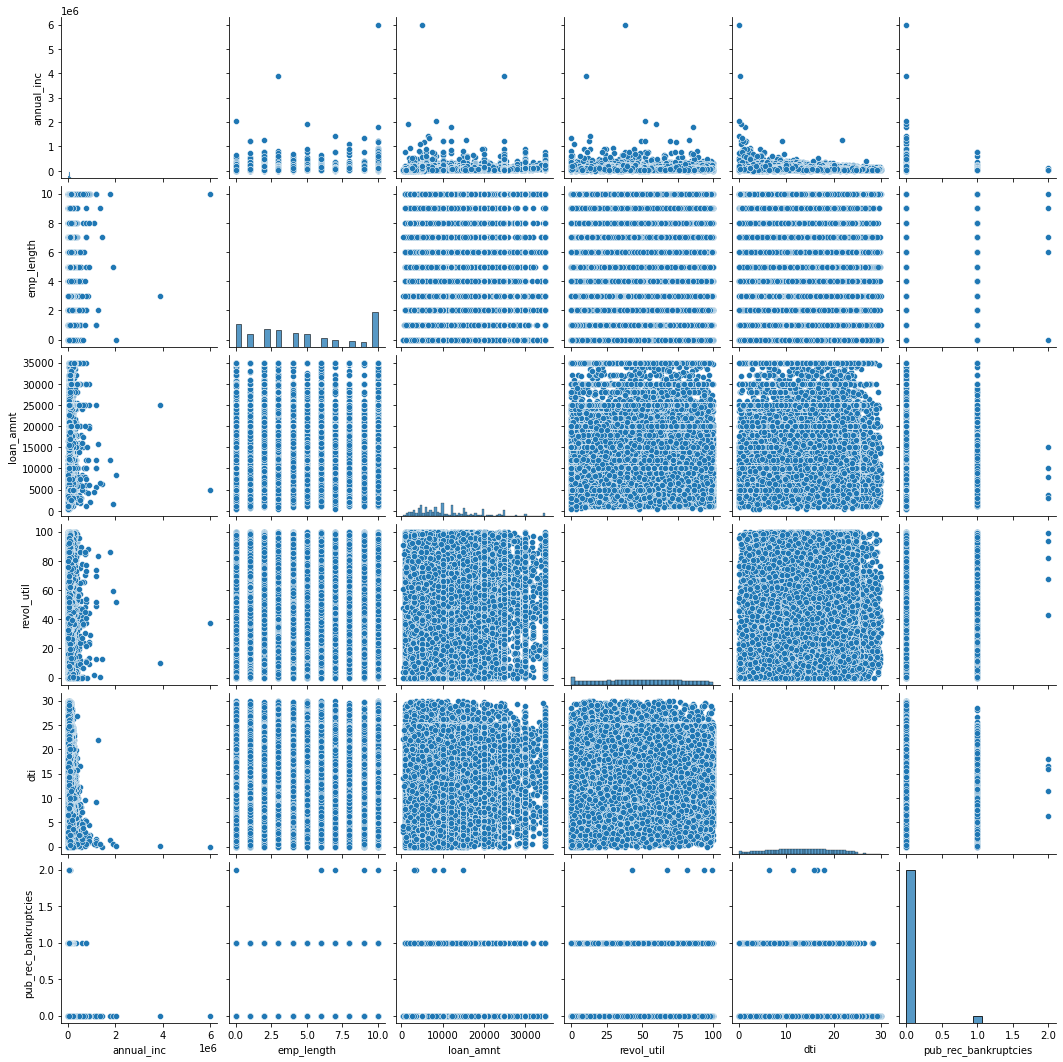

In [95]:
sns.pairplot(loan_data[['annual_inc','emp_length','loan_amnt','revol_util','dti','pub_rec_bankruptcies']])
plt.show()

##### Now understanding the contribution of different variables on loan defaulting 

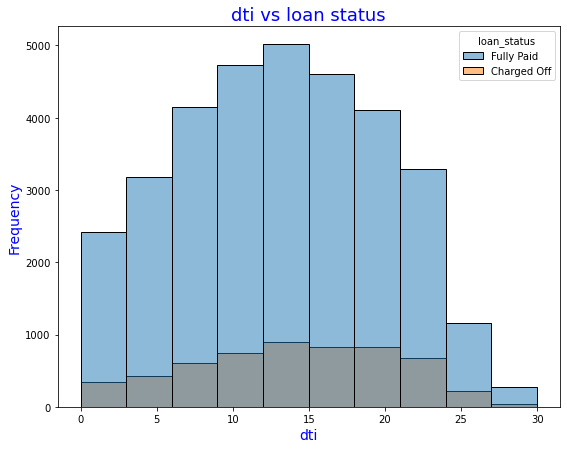

In [96]:
plt.figure(figsize =[9,7])
sns.histplot(data = loan_data , x = 'dti', hue = 'loan_status', bins = 10)

plt.xlabel('dti', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Frequency',  fontdict = {'size':14, 'color' : 'b'})
plt.title('dti vs loan status',fontdict = {'size':18, 'color' : 'b'})

plt.show()

### Observation: Insight 

As per the above histogram, 
the number of fully paid customers decreases with increase in the dti, while the percentage of defaulters increases. 

Bank has to be verify before providing the loan to customers who having more dti

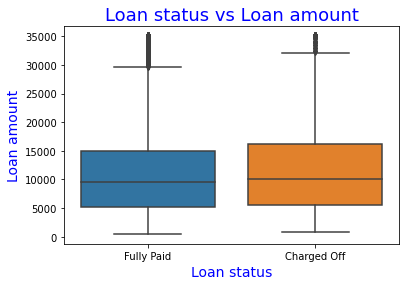

In [97]:
sns.boxplot(data=loan_data, x = 'loan_status', y = 'loan_amnt' )

plt.xlabel('Loan status', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Loan amount',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Loan status vs Loan amount',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: 
The average loan amount for fully paid and charged off customers is nearly same. 

Loan amount is not a contributing factor for defaulting loan. 

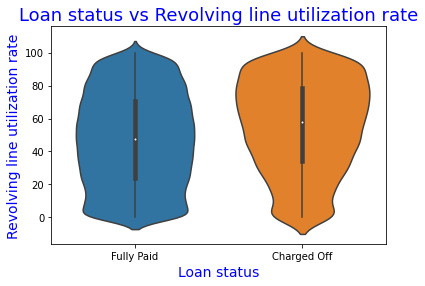

In [98]:
sns.violinplot(data=loan_data, x = 'loan_status', y = 'revol_util' )

plt.xlabel('Loan status', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Revolving line utilization rate',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Loan status vs Revolving line utilization rate',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: 

From the violin plot, the charged off graph is left skewed. 


it is evident that revol_util is a contributing parameter in determining the loan status 

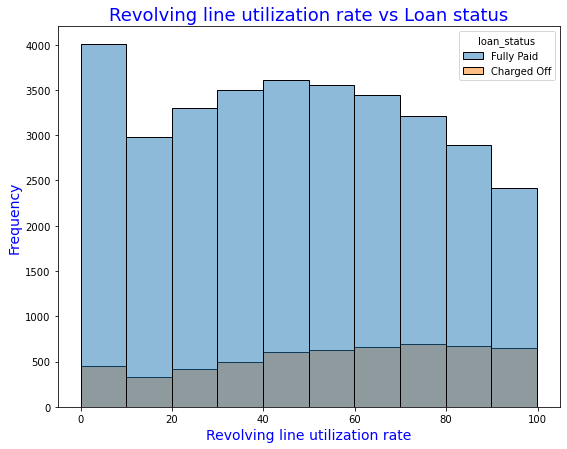

In [99]:
plt.figure(figsize =[9,7])
sns.histplot(data = loan_data , x = 'revol_util', hue = 'loan_status', bins = 10)

plt.xlabel('Revolving line utilization rate', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Frequency',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Revolving line utilization rate vs Loan status',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: Insight 11

As per the above histogram, 
the number of fully paid customers decreases with increase in the revol_util, while the percentage of defaulters increases. 

Bank has to be verify before providing the loan to customers who having more revol_util

### Multivariate analysis:

In [100]:
loan_data['monthly_income']=round(loan_data['annual_inc']/12,2)
loan_data.head()

C:\Users\Bhushan\AppData\Local\Temp/ipykernel_12968/3695009431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['monthly_income']=round(loan_data['annual_inc']/12,2)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_month,int_rate,installment,grade,sub_grade,...,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,monthly_income
0,1077501,1296599,5000,5000,4975,36,10.65,162.87,B,B2,...,AZ,27.65,1,3,0,13648,83.7,9,0,2000.0
1,1077430,1314167,2500,2500,2500,60,15.27,59.83,C,C4,...,GA,1.00,5,3,0,1687,9.4,4,0,2500.0
2,1077175,1313524,2400,2400,2400,36,15.96,84.33,C,C5,...,IL,8.72,2,2,0,2956,98.5,10,0,1021.0
3,1076863,1277178,10000,10000,10000,36,13.49,339.31,C,C1,...,CA,20.00,1,10,0,5598,21.0,37,0,4100.0
5,1075269,1311441,5000,5000,5000,36,7.90,156.46,A,A4,...,AZ,11.20,3,9,0,7963,28.3,12,0,3000.0


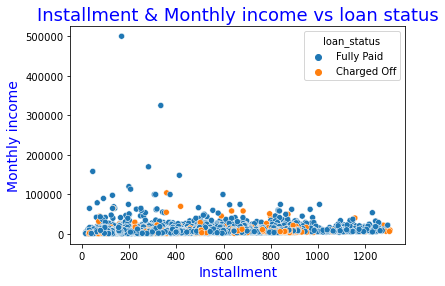

In [101]:
sns.scatterplot(data=loan_data, x='installment',y='monthly_income',hue='loan_status')

plt.xlabel('Installment', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Monthly income',  fontdict = {'size':14, 'color' : 'b'})
plt.title('Installment & Monthly income vs loan status',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: 
As per the above scatter plot, 
monthly income and installments are not significant contributing factors for loan defaulting 

In [102]:
loan_data["emi_vs_inc"]=round(loan_data.installment/loan_data.monthly_income*100,2)


C:\Users\Bhushan\AppData\Local\Temp/ipykernel_12968/628081864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data["emi_vs_inc"]=round(loan_data.installment/loan_data.monthly_income*100,2)


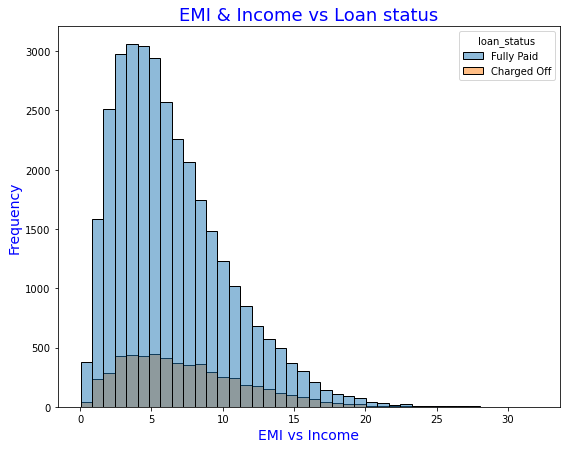

In [103]:
plt.figure(figsize =[9,7])
sns.histplot(data=loan_data,x='emi_vs_inc',hue='loan_status',bins=40)
plt.xlabel('EMI vs Income', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Frequency',  fontdict = {'size':14, 'color' : 'b'})
plt.title('EMI & Income vs Loan status',fontdict = {'size':18, 'color' : 'b'})
plt.show()

### Observation: 

As per the above graph also, 
monthly EMI is not significant contributing factors for loan defaulting 

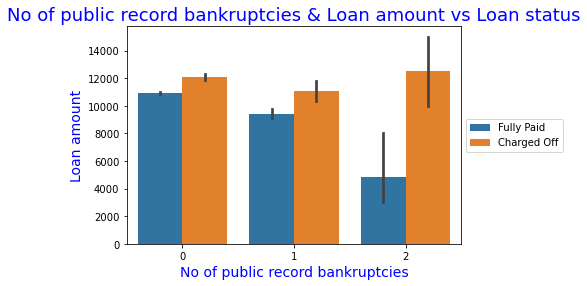

In [104]:
sns.barplot(data = loan_data, x = 'pub_rec_bankruptcies',y='loan_amnt',hue='loan_status')

plt.xlabel('No of public record bankruptcies', fontdict = {'size':14, 'color' : 'b'})
plt.ylabel('Loan amount',  fontdict = {'size':14, 'color' : 'b'})
plt.title('No of public record bankruptcies & Loan amount vs Loan status',fontdict = {'size':18, 'color' : 'b'})
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.show()

### Observation : Insight 

Public bankruptcies is one of the driving factors of loan defaulter.
As count of Public bankruptcies increases, number of defaulters increases while fully paid decreases.

In [105]:
# End of Analysis